##### Работа с изображениями с целью аугментации.
    
1. Изображения, на которых автомобили есть или нет. 100 изображений целевого класса и 100 нецелевого. Размер 256x256px.
2. Библиотеки: OpenCV, pillow, scikit-image, tf.image. 
3. Аугментация (вращение, растяжение/сжатие, увеличение/уменьшение). Количество изображений должно увеличиться минимум в 3 раза.


In [12]:
import cv2
import glob, os
import matplotlib.pyplot as plt
import math
import numpy as np
from skimage import transform
from skimage.transform import swirl
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [13]:
#126 картинок нецелевых, 120 целевых
images = [Image.open(file) for file in glob.glob(r"C:\Users\user\Desktop\CARS\*.jpg")]
len(images)

245

In [14]:
# уменьшение разрешения картинок и сохранение их в отдельный список и папку
resized_imgs = []
directory = r"C:\Users\user\Desktop\resized_cars"
filename = 0
size = 256, 256

os.chdir(directory)

for img in images:
    img.thumbnail(size)
    resized_imgs.append(img)
    filename += 1
    img.save(str(filename) + '.jpg')

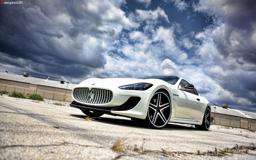

In [32]:
img = Image.open(r"C:\Users\user\Desktop\resized_cars\56.jpg")
img

In [15]:
# поворот уменьшенных картинок
filename = 0

for img in resized_imgs:
    img = np.asarray(img)
    img = transform.rotate(img, angle=45, cval=255)
    filename += 1
    img = Image.fromarray((img * 255).astype(np.uint8))
    img.save(str(filename) + 'rotated' + '.jpg')

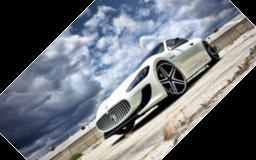

In [34]:
img = Image.open(r"C:\Users\user\Desktop\resized_cars\56rotated.jpg")
img

In [16]:
#создание изображений с эффектом вихря
filename = 0

for img in resized_imgs:
    img = np.asarray(img)
    img = swirl(img, rotation=0, strength=10, radius=120)
    filename += 1
    img = Image.fromarray((img * 255).astype(np.uint8))
    img.save(str(filename) + 'swirled' + '.jpg')

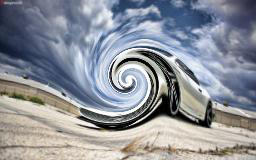

In [35]:
img = Image.open(r"C:\Users\user\Desktop\resized_cars\56swirled.jpg")
img

In [20]:
#создание изображений с применением аффинной трансформации
filename = 0

tform = transform.AffineTransform(shear=np.pi/6,)

for img in resized_imgs:
    img = np.asarray(img)
    img = transform.warp(img, tform.inverse)
    filename += 1
    img = Image.fromarray((img * 255).astype(np.uint8))
    img.save(str(filename) + 'affine_transformed' + '.jpg')

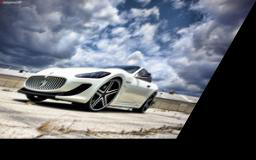

In [33]:
img = Image.open(r"C:\Users\user\Desktop\resized_cars\56affine_transformed.jpg")
img

---
> В итоговом наборе данных после всех манипуляций с изображениями содержится 980 файлов